In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [12]:
def getStoreDF(storeId: int, departementId: int, testSize: int=0):
    df = pd.read_csv("data/train.csv")
    store = df[(df["Store"] == storeId) & (df["Dept"] == departementId)]
    if (len(store) < 1):
        return None, None
    store['Date'] = pd.to_datetime(store['Date'], format='%Y-%m-%d')
    if (testSize > 0):
        store_train = store[:-testSize]
        store_test = store[-testSize:]
        return store_train, store_test
    return store, None 

In [13]:
seriesTrain, seriesTest = getStoreDF(1,1, 12)

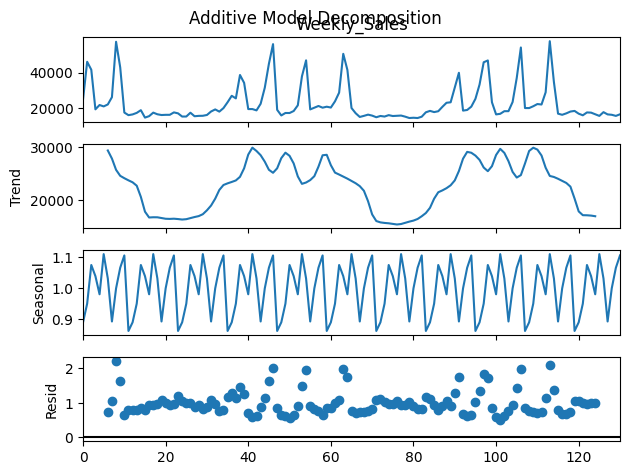

In [15]:
result_additive = seasonal_decompose(seriesTrain["Weekly_Sales"], model='multiplicative', period=12)
result_additive.plot()
plt.suptitle('Additive Model Decomposition')
plt.show()